In [6]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
imshowg = lambda x: plt.imshow(x,cmap=plt.get_cmap('gray'))
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
import stackedpermute

In [43]:
img_bgr  = cv2.imread('town.png',cv2.IMREAD_COLOR)
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)
l,u,v = cv2.split(img)

#da,db,dc = stackedpermute.makeflatsubdims(q,("x","y","c"))
#qq = stackedpermute.stackedpermute(q,(da,db,dc),((da,db),dc))
#TODO reshape to make it  xy,c from x,y,c
#da,db,dc = stackedpermute.makeflatsubdims(img,("x","y","c"))
#r0 = stackedpermute.stackedpermute(img,(da,db,dc),((da,db),dc))
r0 = img.reshape((-1,3))

imgl0 = cv2.cvtColor(cv2.merge([np.ones_like(l)*128,u,v]),cv2.COLOR_LAB2RGB)
#r = stackedpermute.stackedpermute(imgl0,(da,db,dc),((da,db),dc))/255.0
r = imgl0.reshape((-1,3))/255.0
print r.shape,r.dtype

(666225, 3) float64


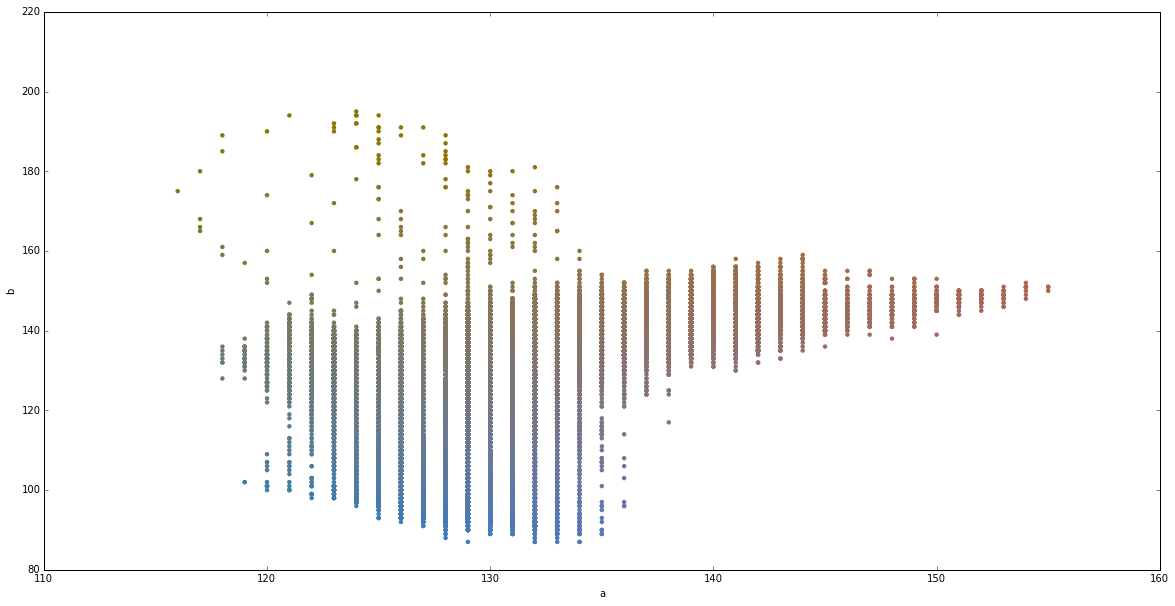

In [44]:
plt.scatter(u,v,c=r,lw=0)
plt.xlabel('a')
plt.ylabel('b')


(666225, 1)


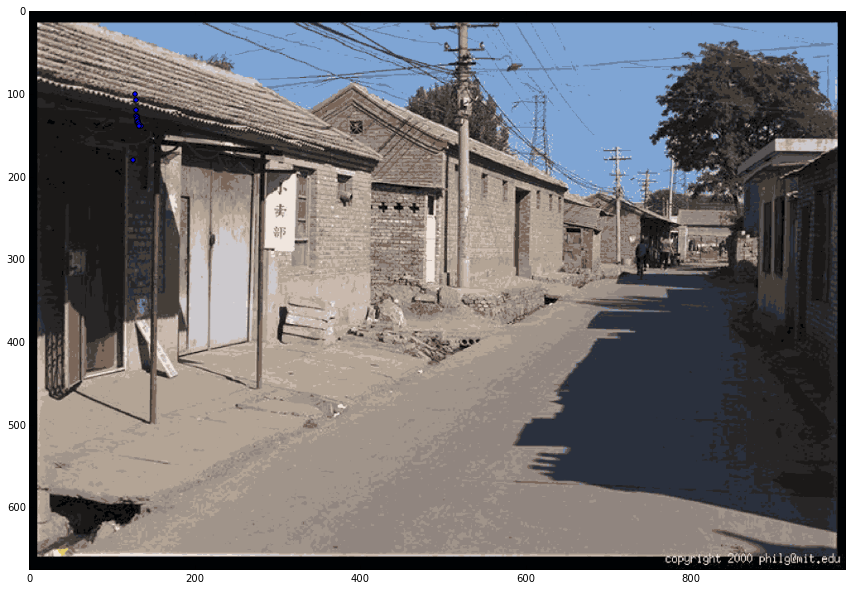

In [32]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
q = cv2.merge([l,u,v]).astype(np.float32)
qq = q.reshape((-1,3))

ret,label,center=cv2.kmeans(qq,16,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
print label.shape
plt.scatter(center[:,1],center[:,2])

# go back to the image, and inject the luminance
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
plt.imshow(cv2.cvtColor(res2,cv2.COLOR_LAB2RGB))